In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
data = pd.read_csv(r"C:\Users\DELL\Downloads\Telco_customer_churn.csv")

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'churn_rate', 'Churn Score', 'CLTV', 'Churn Reason', 'Count', 'Country',
       'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Age',
       'Under 30', 'Married', 'Referred a Friend', 'Number of Referrals',
       'Offer', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download',
       'Streaming Music', 'Premium Tech Support', 'Unlimited Data',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score',
       'Customer Status', 'Churn Score.1', 'Churn Category'],
      dtype='object')

In [6]:
data.shape

(7043, 52)

In [7]:
data.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3668-QPYBK    Male              0      No         No       2   
1     9237-HQITU  Female              0      No         No       2   
2     9305-CDSKC  Female              0      No         No       8   
3     7892-POOKP  Female              0     Yes         No      28   
4     0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7038  2569-WGERO  Female              0      No         No      72   
7039  6840-RESVB    Male              0     Yes        Yes      24   
7040  2234-XADUH  Female              0     Yes        Yes      72   
7041  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes                No             

In [8]:
data.tail

<bound method NDFrame.tail of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     3668-QPYBK    Male              0      No         No       2   
1     9237-HQITU  Female              0      No         No       2   
2     9305-CDSKC  Female              0      No         No       8   
3     7892-POOKP  Female              0     Yes         No      28   
4     0280-XJGEX    Male              0      No         No      49   
...          ...     ...            ...     ...        ...     ...   
7038  2569-WGERO  Female              0      No         No      72   
7039  6840-RESVB    Male              0     Yes        Yes      24   
7040  2234-XADUH  Female              0     Yes        Yes      72   
7041  4801-JZAZL  Female              0     Yes        Yes      11   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
0             Yes                No             

In [9]:
data.nunique()

customerID                           7043
gender                                  2
SeniorCitizen                           2
Partner                                 2
Dependents                              2
tenure                                 73
PhoneService                            2
MultipleLines                           3
InternetService                         3
OnlineSecurity                          3
OnlineBackup                            3
DeviceProtection                        3
TechSupport                             3
StreamingTV                             3
StreamingMovies                         3
Contract                                3
PaperlessBilling                        2
PaymentMethod                           4
MonthlyCharges                       1585
TotalCharges                         6531
Churn                                   2
churn_rate                              2
Churn Score                            85
CLTV                              

In [10]:
data.isna().sum()

customerID                              0
gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
InternetService                         0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
churn_rate                              0
Churn Score                             0
CLTV                              

In [11]:
data.isnull().sum()

customerID                              0
gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
MultipleLines                           0
InternetService                         0
OnlineSecurity                          0
OnlineBackup                            0
DeviceProtection                        0
TechSupport                             0
StreamingTV                             0
StreamingMovies                         0
Contract                                0
PaperlessBilling                        0
PaymentMethod                           0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
churn_rate                              0
Churn Score                             0
CLTV                              

In [14]:
print("Number of rows before removing duplicates", len(data))

Number of rows before removing duplicates 7043


In [15]:
data_cleaned = data.drop_duplicates()

In [16]:
print("Number of rows after removing duplicates", len(data))

Number of rows after removing duplicates 7043


In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,churn_rate,Churn Score,CLTV,Count,Zip Code,Latitude,Longitude,Age,Number of Referrals,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Churn Score.1
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.265370,58.699418,4400.295755,1.0,93521.964646,36.282441,-119.798880,46.509726,1.951867,22.958954,20.515405,1.962182,6.860713,749.099262,3034.379056,3.244924,58.505040
std,0.368612,24.559481,30.090047,0.441561,21.525131,1183.057152,0.0,1865.794555,2.455723,2.157889,16.750352,3.001199,15.448113,20.418940,7.902614,25.104978,846.660055,2865.204542,1.201657,21.170031
min,0.000000,0.000000,18.250000,0.000000,5.000000,2003.000000,1.0,90001.000000,32.555828,-124.301372,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.360000,1.000000,5.000000
25%,0.000000,9.000000,35.500000,0.000000,40.000000,3469.000000,1.0,92102.000000,34.030915,-121.815412,32.000000,0.000000,9.210000,3.000000,0.000000,0.000000,70.545000,605.610000,3.000000,40.000000
50%,0.000000,29.000000,70.350000,0.000000,61.000000,4527.000000,1.0,93552.000000,36.391777,-119.730885,46.000000,0.000000,22.890000,17.000000,0.000000,0.000000,401.440000,2108.640000,3.000000,61.000000
75%,0.000000,55.000000,89.850000,1.000000,75.000000,5380.500000,1.0,95351.000000,38.224869,-118.043237,60.000000,3.000000,36.395000,27.000000,0.000000,0.000000,1191.100000,4801.145000,4.000000,75.500000
max,1.000000,72.000000,118.750000,1.000000,100.000000,6500.000000,1.0,96161.000000,41.962127,-114.192901,80.000000,11.000000,49.990000,85.000000,49.790000,150.000000,3564.720000,11979.340000,5.000000,96.000000


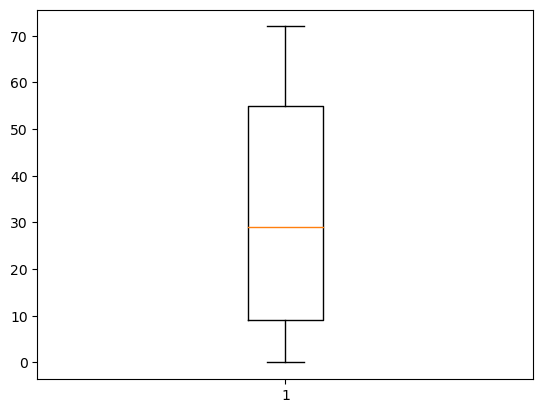

In [21]:
import matplotlib.pyplot as plt
plt.boxplot(data['tenure'])
plt.show()

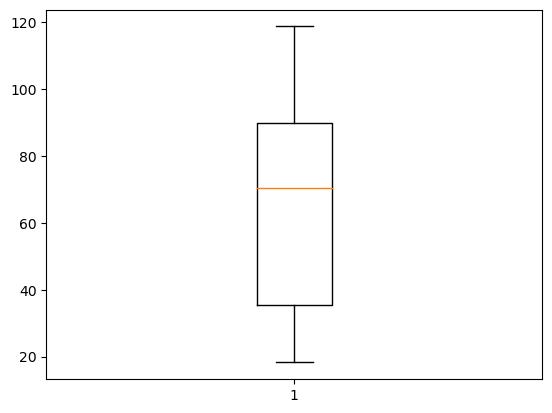

In [22]:
plt.boxplot(data['MonthlyCharges'])
plt.show()